In [1]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (14, 4)

import json

from pitchfilter.pitchfilter import PitchFilter
from tonicidentifier.toniclastnote import TonicLastNote
from notemodel.notemodel import NoteModel
from morty.pitchdistribution import PitchDistribution


In [2]:
# inputs; pitch track and makam of the recording
rec_makam = "huseyni"
pitch_file = 'huseyni--sazsemaisi--aksaksemai----tatyos_efendi/8b8d697b-cad9-446e-ad19-5e85a36aa253.json'
pitch = json.load(open(pitch_file, 'r'))['pitch']

# Extra: Postprocess the pitch track to get rid of spurious pitch estimations and correct octave errors
flt = PitchFilter()
pitch = flt.run(pitch)


In [3]:
# run tonic identification using last note detection
tonic_identifier = TonicLastNote()
tonic = tonic_identifier.identify(pitch)[0]  # don't use the distribution output 
# from here, it is only computed from the end of the recording


In [4]:
# compute the pitch distribution
pitch_distribution = PitchDistribution.from_hz_pitch(pitch[:,1], ref_freq=tonic['value'])


In [5]:
# Obtain the the stable notes
model = NoteModel()
stablenotes = model.calculate_notes(pitch_distribution, tonic['value'], rec_makam)


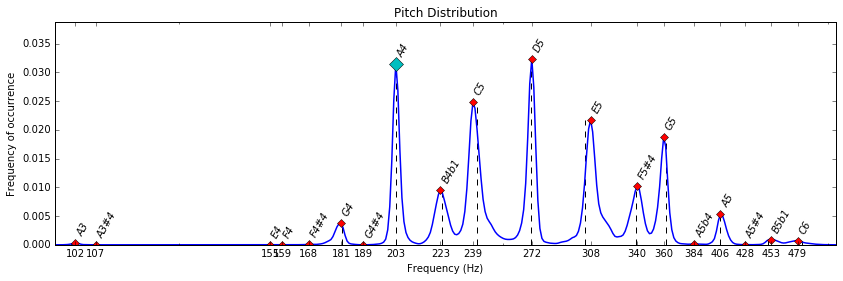

In [6]:
# plot the result
model.plot(pitch_distribution, stablenotes)
pylab.show()
